In [1]:
import numpy as np 
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import SGDClassifier

In [2]:
# on va entrainer un modele sur des mnist ( image avec chiffre) et il va predire ( reconnaitre )chaque chiffre 
# se trouvant sur une image. Probleme de classification ( reconnaissance d'image)
mnist = fetch_openml('mnist_784', version=1)

In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
# data = variables explicatives (X)
# target = variable expliquée (qu'on essaye de prédire) (y)
X, y = mnist["data"], mnist["target"]

In [6]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [8]:
type(y[0])

str

In [9]:
# uint (abréviation de "unsigned integer") est un type de données représentant des nombres entiers non signés, 
# donc toujours positifs, avec une plage de valeurs dépendant 
# du nombre de bits alloués (par exemple, uint8 pour 8 bits).
y = y.astype(np.uint8)
type(y[0])

numpy.uint8

In [10]:
# 28 * 28 = 784
print("X : ",X.shape)
print("y : ",y.shape)

X :  (70000, 784)
y :  (70000,)


In [11]:
# X.iloc[0] (car X est df)
# Sinon convertir en array
X_array = np.array(X)
X_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
y_array = np.array(y)
y_array

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

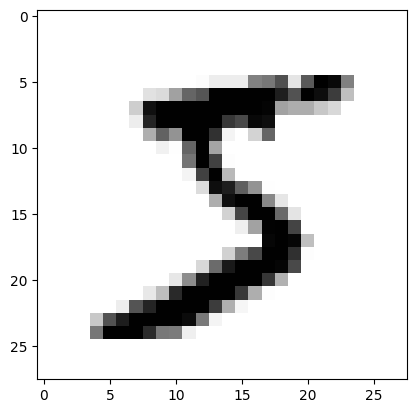

In [13]:
first_image = X_array[0].reshape(28,28)
plt.imshow(first_image, cmap= mpl.cm.binary, interpolation="nearest")

In [14]:
print(y_array[0])

5


In [15]:
# Création training et test datasets
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test)=train_test_split(X_array, y_array, test_size=0.2)

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

### Méthode 02 : test_size = 20%
# 0.8 * 70000 = 56000
# X_train, X_test, y_train, y_test = X_array[:56000], X_array[56000:], y_array[:56000], y_array[56000:]

56000
56000
14000
14000


In [16]:
# Classification binaire pour le chiffre 5
y_train_5 = (y_train == 5)
print(y_train_5)

y_test_5 = (y_test == 5)
print(y_test_5)

[False False  True ... False False False]
[False False False ... False False False]


In [17]:
print(np.unique(y_train_5))

[False  True]


In [18]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [19]:
y_pred = sgd_clf.predict(X_test)
y_pred

array([False, False, False, ..., False, False,  True])

In [20]:
A = X_array[0]
B = X_array[23]
C = X_array[5000]
# Pour vérifier : sachant que c'est y_array[] = 5 => True , sinon False

In [21]:
print(y_array[0])
print("it's equal to 5", sgd_clf.predict([A]))

5
it's equal to 5 [ True]


In [22]:
print(y_array[23])
sgd_clf.predict([B])

1


array([False])

In [23]:
print(y_array[5000])
sgd_clf.predict([C])

7


array([False])

In [24]:
from sklearn.metrics import confusion_matrix
#Calcul de la matrice de confusion
cm = confusion_matrix(y_test_5, y_pred)
print(cm)
# VN = 12415 (False prédit correctement)
# FP = 179 (False prédit à tort comme True)
# FN = 362 (True prédit à tort comme False)
# VP = 1044 (True prédit correctement)

[[12331   402]
 [  189  1078]]


In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_5, y_pred)
print("Accuracy:", accuracy)
# Parmi toutes les observations, on a 96% de prédictions correctes

Accuracy: 0.9577857142857142


In [26]:
from sklearn.metrics import precision_score
precision = precision_score(y_test_5, y_pred)
print("Precision:", precision)
# Parmi les obs positives, on a 74% de VP. le modele prédit bien les positives

Precision: 0.7283783783783784


In [27]:
from sklearn.metrics import recall_score
recall = recall_score(y_test_5, y_pred)
print("Recall:", recall)
# Parmi les obs réellement positives on 85% des vrais positifs qui sont détectés, le modele capture la plupart des positifs

Recall: 0.850828729281768


In [28]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test_5, y_pred)
print("F1 Score:", f1)
# La moyenne harmonique du rappel et de la précision est 79%, qui est assez élevé et qui prouve que le modele capture et prédit la plupart des 
# positifs

F1 Score: 0.784856206771023


In [29]:
# classification pour le chiffre 7
y_test_7 = (y_test == 7)
y_train_7 = (y_train == 7)

sgd_clf1 = SGDClassifier(random_state=42)
sgd_clf1.fit(X_train, y_train_7)
y_pred1 = sgd_clf1.predict(X_test)

In [30]:
sgd_clf1.predict([C])

array([False])

In [31]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
# Cross validation : mesure de précision, base de ML
# voir capaciter à généraliser correspond bien aux données réels

# Cross validation stratifié ?
'''
CV : on divise en n nombre de folds 
pour chaque fold on entraine le modele sur n-1 folds et on teste sur le fold restant


cross-validation we are splitting the training set into 5 folds (cv=5) and training the model 5 times on different folds and evaluating on the 5th fold.
n_splits = 5
stratified_k_fold pour la representatitivite 

[k1]  [k2]  [k3]  [k4]  [k5]  


premiere iteration : 
TRAIN : [k1]  [k2]  [k3]  [k4]  
TEST : [k5]


deuxieme iteration: 
TRAIN: [k1]  [k2]  [k3]  [k5]  
TEST : [k4]

troisieme iteration: 
TRAIN: [k1]  [k2]  [k3]  [k5]  
TEST : [k4]

'''

'\nCV : on divise en n nombre de folds \npour chaque fold on entraine le modele sur n-1 folds et on teste sur le fold restant\n\n\ncross-validation we are splitting the training set into 5 folds (cv=5) and training the model 5 times on different folds and evaluating on the 5th fold.\nn_splits = 5\nstratified_k_fold pour la representatitivite \n\n[k1]  [k2]  [k3]  [k4]  [k5]  \n\n\npremiere iteration : \nTRAIN : [k1]  [k2]  [k3]  [k4]  \nTEST : [k5]\n\n\ndeuxieme iteration: \nTRAIN: [k1]  [k2]  [k3]  [k5]  \nTEST : [k4]\n\ntroisieme iteration: \nTRAIN: [k1]  [k2]  [k3]  [k5]  \nTEST : [k4]\n\n'

In [32]:
k_fold = StratifiedKFold(n_splits=5)
X_train, y_train_7
for i_train, i_test in k_fold.split(X_train, y_train_7):
    clone_clf1 = clone(sgd_clf1)
    X_train_folds = X_train[i_train]
    y_train_folds = y_train_7[i_train]
    X_test_folds = X_train[i_test]
    y_test_folds = y_train_7[i_test]

    clone_clf1.fit(X_train_folds, y_train_folds)
    y_pred11 = clone_clf1.predict(X_test_folds)
    n_correct = sum(y_pred11 == y_test_folds)
    print(n_correct / len(y_pred11))


0.9808928571428571
0.95375
0.9801785714285715
0.9626785714285714
0.9748214285714286


In [33]:
# On peut aussi faire ça en faisant appel à la fct
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf1, X_train, y_train_7, cv=5, scoring="accuracy")

array([0.98089286, 0.95375   , 0.98017857, 0.96267857, 0.97482143])

In [34]:
# Option 1 : 
cm1 = confusion_matrix(y_train_7, sgd_clf1.predict(X_train))
cm1

array([[50004,    99],
       [ 1510,  4387]])

In [35]:
from sklearn.model_selection import cross_val_predict
# Option 2 : 
cm2_cv_7 = confusion_matrix(y_train_7, cross_val_predict(sgd_clf1, X_train, y_train_7, cv=5))
cm2_cv_7

array([[49372,   731],
       [  923,  4974]])

In [36]:
# Precision = VP / VP + FP
# Recall = VP / VP + FN
from sklearn.metrics import precision_score, recall_score
pred_cross_validation = cross_val_predict(sgd_clf1, X_train, y_train_7, cv=5)
precision1 = precision_score(y_train_7, pred_cross_validation) 
recall1 = recall_score(y_train_7, pred_cross_validation)

print("precision : ", precision1)
print("recall : ", recall1)

# interepreter ces resultats ?
# precision : 0.82, quand le modele avance l'idee que l' est un 5. il a raison 82% du temps
# recall : 0,75, le modele detecte uniquement 75% des 5 existans dans le dataset

precision :  0.8718667835232252
recall :  0.8434797354587078


In [37]:
precision1 = np.array([precision1])

In [38]:
recall1 = np.array([recall1])

In [39]:
# F1 score : c'est la moyenne harmonique entre la precision et le rappel
# formule : 2 / ( (1/precision) + (1/recall) )
# Correlation negative entre precision et recall si l'un augmente l'autre diminue
# Selon la problématique du projet/entreprise, on peut choisir de mettre plus d'importanc 
# sur la precision ou le recall
## si on veut predire le passage de la route pour les personnes aveugles on va mettre plus d' importance sur le recall
## si on veut predire les transactions frauduteuses on va mettre plus d'importance sur la precislon

from sklearn.metrics import f1_score

f1_sco1 = f1_score(y_train_7, pred_cross_validation)

print("f1 score : ", f1_sco1)

f1 score :  0.8574383726943631


ValueError: x and y must have same first dimension, but have shapes (2,) and (0,)

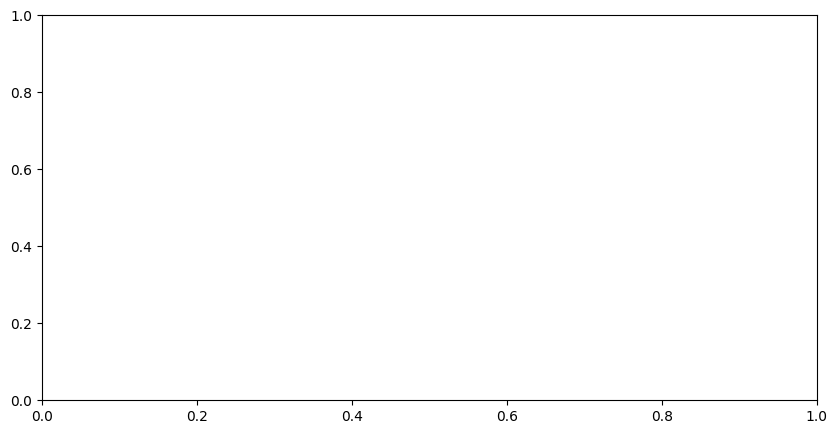

In [41]:
# courbe precision recall
from sklearn.metrics import precision_recall_curve



precision, recall, thresholds = precision_recall_curve(y_train_7, pred_cross_validation)
plt.figure(figsize=(10,5))
plt.plot(thresholds, precision1[:-1], "b--", label="Precision")
plt.plot(thresholds, recall1[:-1], "g-", label="Recall")

idx = (thresholds>= 3000).argmax()
plt.plot(thresholds[idx], precision1[idx], 'bo')
plt.plot(thresholds[idx], recall1[idx], 'go')
plt.axis([-10000, 10000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

AttributeError: Line2D.set() got an unexpected keyword argument 'Linewidth'

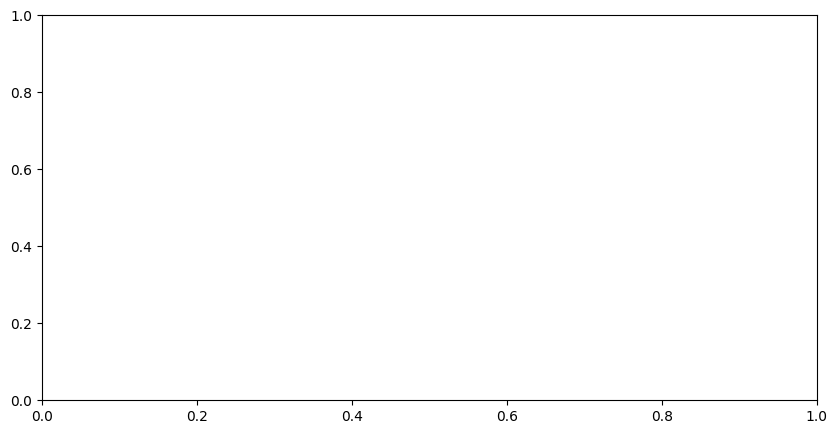

In [40]:
#courbe ROC : receiver operating characteristic
# permet de visualiser la performance d'un modele de classification binaire
# similaire a la courbe precision recall mais au lieu de plotter ta precesion en fonction recall on plotte te taux de vrai positif (recall) en fonction du taux de taux positif
## TPR (true positive rate) : recall
## FPR (false positive rate) : FP / (FP + VN)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_7, pred_cross_validation)

idx = (thresholds<=recall1).argmax()
tpr_test, frp_test = tpr[idx], fpr[idx]

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, Linewidth=2, label="Courbe ROC")
plt.plot([0,1], [0,1], "k--", label="Roc Curve")
plt.plot([frp_test], [tpr_test], 'ro', label= 'Thresholds for X% precision')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend(loc="center right")
plt.show


TypeError: unsupported format string passed to numpy.ndarray.__format__

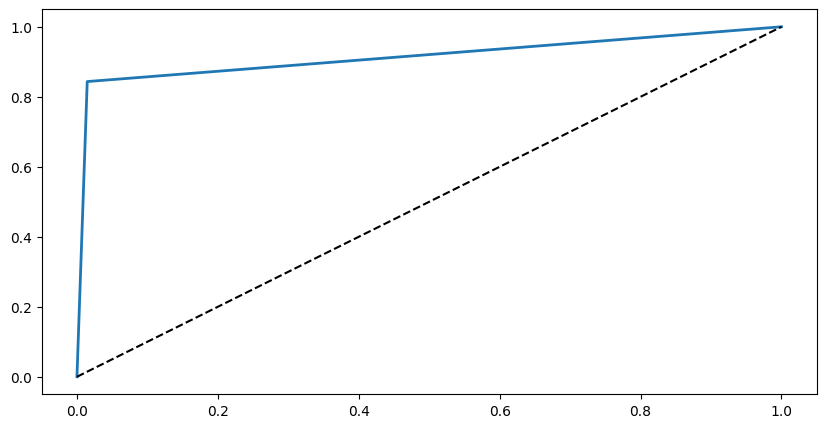

In [40]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_train_7, pred_cross_validation)


idx = np.argmax(thresholds <= recall1)  # Index du seuil correspondant

# Récupération des taux TPR et FPR pour ce seuil
tpr_test, fpr_test = tpr[idx], fpr[idx]

# Tracé de la courbe ROC
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, linewidth=2, label="Courbe ROC")
plt.plot([0, 1], [0, 1], "k--", label="Baseline ROC")
plt.plot([fpr_test], [tpr_test], 'ro', label=f'Seuil pour {recall1:.2f} de rappel')

# Configuration des axes et de la légende
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC avec seuil personnalisé")
plt.grid()
plt.legend(loc="lower right")
plt.show()
